In [1]:
import pandas as pd   
import numpy as np    

## Getting the data


In [3]:
# Use the file you obtained at the end of Part1
filepath = "bankloans-data-clean.csv"

In [4]:
# Read data from a CSV file : this will return a DataFrame object
df = pd.read_csv(filepath)

In [5]:
# verify number of rows and columns in this DataFrame
df.shape

(45000, 13)

In [6]:
# display first few rows in this DataFrame
df.head()

,age_group,credit_card_balance_ratio,debt_ratio,defaulted,gender,marital_status,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
0,middle_aged,0.011639,0.053386,1,Male,married,3558.000000,2.0,0,0,0,5,0
1,young,0.031554,0.032146,0,Female,single,6625.000000,0.0,0,0,0,3,0
2,senior,1.000000,1.000000,0,Male,divorced,6675.478043,0.0,0,0,0,4,0
3,young,0.006666,4.000000,0,Male,married,6675.478043,0.0,0,0,0,2,0
4,young,0.097509,68.000000,0,Female,married,6675.478043,0.0,0,0,0,7,0


In [7]:
# check list of column names
df.columns

Index(['age_group', 'credit_card_balance_ratio', 'debt_ratio', 'defaulted',
       'gender', 'marital_status', 'monthly_income', 'nb_dependents',
       'nb_late_payments_1month', 'nb_late_payments_2months',
       'nb_late_payments_3+months', 'nb_open_loans', 'nb_special_loans'],
      dtype='object')

In [8]:
# check global statistics of each attribute (including missing values)
df.describe()

,credit_card_balance_ratio,debt_ratio,defaulted,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,5.692377,366.114262,0.066022,6.675478e+03,0.760629,0.416289,0.232911,0.261356,8.436133,1.024778
std,208.062208,2504.362003,0.248324,1.215258e+04,1.104898,4.100654,4.060182,4.076032,5.131408,1.124936
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030024,0.176616,0.000000,3.900000e+03,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.150540,0.367925,0.000000,6.590500e+03,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,0.557938,0.889774,0.000000,7.333000e+03,1.000000,0.000000,0.000000,0.000000,11.000000,2.000000
max,22198.000000,329664.000000,1.000000,1.794060e+06,20.000000,98.000000,98.000000,98.000000,52.000000,25.000000


## Data transformation




In [9]:
# Apply min-max normalization on all numeric attributes. Put the resut in a new data frame.
df.rename(columns={'nb_late_payments_3+months': 'nb_late_payments_3months'}, inplace=True)
from sklearn import preprocessing
df1=df

columns_to_normalize = ['credit_card_balance_ratio', 'debt_ratio','monthly_income', 'nb_dependents', 'monthly_income',
              'nb_late_payments_1month','nb_late_payments_2months','nb_late_payments_3months','nb_open_loans',
              'nb_special_loans']
x = df1[columns_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=columns_to_normalize, index = df1.index)
df1[columns_to_normalize] = df_temp
df1.columns


Index(['age_group', 'credit_card_balance_ratio', 'debt_ratio', 'defaulted',
       'gender', 'marital_status', 'monthly_income', 'nb_dependents',
       'nb_late_payments_1month', 'nb_late_payments_2months',
       'nb_late_payments_3months', 'nb_open_loans', 'nb_special_loans'],
      dtype='object')

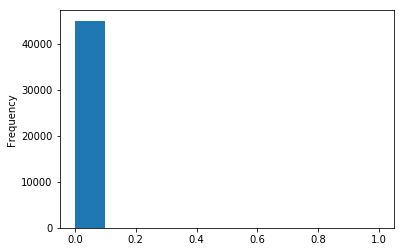

In [11]:
df1['monthly_income'].plot(kind='hist')

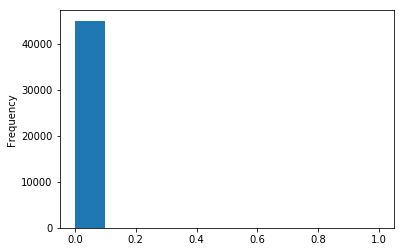

In [12]:
from scipy import stats
df2=df
columns_to_normalize = ['credit_card_balance_ratio', 'debt_ratio','monthly_income', 'nb_dependents', 'monthly_income',
              'nb_late_payments_1month','nb_late_payments_2months','nb_late_payments_3months','nb_open_loans',
              'nb_special_loans']
df2[columns_to_normalize].apply(stats.zscore)
df2['monthly_income'].plot(kind='hist')



In [14]:
#Apply one-hot encoding on all categorical attributes. 
#Put result in a new data frame that contains only numeric attributes.  
# do one hot encoding for the age_group
df3 = pd.DataFrame({'age_group': [' young', 'middle_aged', 'senior_citizen']})
df3 = pd.concat([df3,pd.get_dummies(df3['age_group'], prefix='age_group')],axis=1)
df3.drop(['age_group'],axis=1, inplace=True)
#By default, the get_dummies() does not do dummy encoding, but one-hot encoding.
df3.head()
# do one hot encoding for the gender
df4 = pd.DataFrame({'gender': [' Male', 'Female']})
df4 = pd.concat([df4,pd.get_dummies(df4['gender'], prefix='gender')],axis=1)
df4.drop(['gender'],axis=1, inplace=True)
df4.head()
# do one hot e,coding for the marital status
df5 = pd.DataFrame({'marital_status': ['single', 'married', 'divorced', 'widowed']})
df5 = pd.concat([df5,pd.get_dummies(df5['marital_status'], prefix='marital_status')],axis=1)
df5.drop(['marital_status'],axis=1, inplace=True)
df5.head()
frames = [df3, df4, df5]
new_frames = pd.concat(frames) 

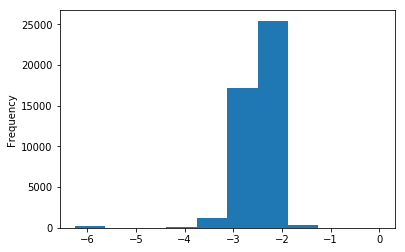

In [15]:
# Apply log transformation on monthly_income. Put result after transformation in a new data frame.
mask = df.monthly_income>0
df6=pd.Series(np.log10(df.monthly_income[mask])).plot(kind='hist') #SAme before normalizing 